In [25]:
# Import functions
import numpy as np
import matplotlib.pyplot as p
% matplotlib inline

import lightcurves_sh
import pca_eig
import kmeans
import bin_eigenspectra

Creat a fake data set

(10, 6, 4)


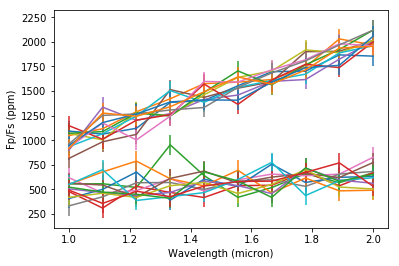

In [29]:
lamdim = 10
latdim = 6
londim = 4
ngroups = 2

# dummy flux values
waves = np.linspace(1,2,lamdim) # micron
spec1 = np.linspace(1000,2000,lamdim) # in ppm
spec2 = np.linspace(500,600,lamdim) # in ppm

spectra1 = [[ spec1+np.random.normal(0,100,lamdim) for _ in range(latdim) ] for __ in range(londim/2)]
spectra2 = [[ spec2+np.random.normal(0,100,lamdim) for _ in range(latdim) ] for __ in range(londim/2)]
fp_grid = np.array(spectra1+spectra2).T
print fp_grid.shape # should be wave, lat, lon


for lat in range(latdim):
    for lon in range(londim):
        spec = fp_grid[:,lat,lon]
        err = 100 # ppm
        p.errorbar(waves, spec, err)
p.ylabel('Fp/Fs (ppm)')
p.xlabel('Wavelength (micron)')
p.show()

Get groups from K-means clustering

In [30]:
kgroups = kmeans.kmeans(fp_grid, ngroups)

Create eigenspectra

In [31]:
eigenspectra = bin_eigenspectra.bin_eigenspectra(fp_grid, kgroups)

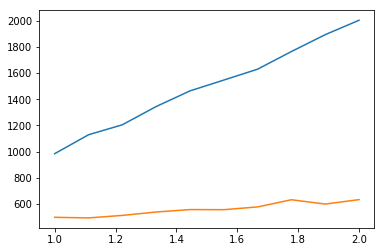

In [33]:
for spec in eigenspectra:
    p.plot(waves, spec)
p.show()